In [1]:
import config
import visual.plot as vplot
from model.sirmodel import SIRModel

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy

In [2]:
df = pd.read_csv("data/covid/france/evolution_par_jour.csv", sep=",")
df.tail()

,Unnamed: 0,date,granularite,maille_code,maille_nom,cas_confirmes,cas_ehpad,cas_confirmes_ehpad,cas_possibles_ehpad,deces,deces_ehpad,reanimation,hospitalises,gueris,depistes,source_nom,source_url,source_archive,source_type,susceptible
100,100,2020-05-08,pays,FRA,France,138421.0,72548.0,34890.0,NaN,16497.0,9733.0,2868.0,22724.0,55782.0,NaN,Ministère des Solidarités et de la Santé,NaN,NaN,ministere-sante,66789300.0
101,101,2020-05-09,pays,FRA,France,138854.0,72850.0,35046.0,NaN,16573.0,9737.0,2812.0,22614.0,56038.0,NaN,Ministère des Solidarités et de la Santé,NaN,NaN,ministere-sante,66788535.0
102,102,2020-05-10,pays,FRA,France,139063.0,73143.0,35236.0,NaN,16642.0,9738.0,2776.0,22569.0,56217.0,NaN,Ministère des Solidarités et de la Santé,NaN,NaN,ministere-sante,66788078.0
103,103,2020-05-11,pays,FRA,France,139519.0,73099.0,35195.0,NaN,16820.0,9823.0,2712.0,22284.0,56724.0,NaN,Ministère des Solidarités et de la Santé,NaN,NaN,ministere-sante,66786937.0
104,104,2020-05-12,pays,FRA,France,140227.0,73435.0,35437.0,NaN,17003.0,9988.0,2542.0,21595.0,57785.0,NaN,Ministère des Solidarités et de la Santé,NaN,NaN,ministere-sante,66784985.0


In [3]:
df = df[df["date"] < "2020-04-01"]

## Fit

In [4]:
sir = SIRModel(N=67000000, R0=0, I0=df.loc[0, "cas_confirmes"])

In [5]:
t = range(df.shape[0])
sir.fit(t, df["cas_confirmes"])

d:\dev\projects\projet_sdd\venv\lib\site-packages\scipy\integrate\odepack.py:248: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


[3.49639779 3.33149102]


## Predict

In [6]:
# Integrate the SIR equations over the time grid, t.
t = range(100)
S, I, R = sir.predict(t)

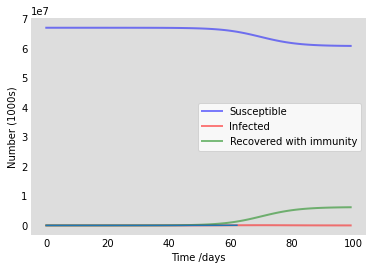

In [7]:
vplot.plot_SIR(S, I, R, t)
df["cas_confirmes"].plot()

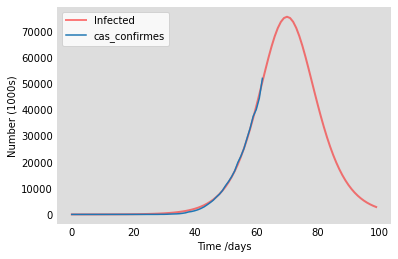

In [8]:
vplot.plot_SIR(S=None, I=I, R=None, t=t) # only I
df["cas_confirmes"].plot(legend=True)